In [4]:
import source.prepare_data as prd
import source.dataset as dat
import source.multi_layer_perceptron as mlp
import source.table as tb
import source.comparision as comp
import source.recurent_neural_networks as rnn
from importlib import reload
import pandas as pd
import spacy

In [5]:
"""
1) Preprocessing
"""
# load models and dataset
df = pd.read_csv("hf://datasets/gxb912/large-twitter-tweets-sentiment/train.csv", nrows=100)
nlp = spacy.load("en_core_web_sm")

In [28]:
df['sentiment']

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    1
97    0
98    1
99    1
Name: sentiment, Length: 100, dtype: int64

In [6]:
# prepare dataset
df = prd.prepare_df(df, nlp)

# create dataset out of cleaned columns
dataset = dat.Text_Dataset(df, col_text="clean_text_str", col_label="sentiment", args={"max_features":5000})
dataset.split_dataset()

In [5]:
comp.run_end_evaluate("MLP", dataset, "bow")

0.550000011920929

In [7]:
reload(prd)
reload(dat)
reload(mlp)
reload(tb)
reload(comp)
reload(rnn)
comp.test_split_ratio(dataset, "RNN", "EBM")
comp.test_split_ratio(dataset, "LSTM", "EBM")
comp.test_split_ratio(dataset, "GRU", "EBM")
comp.test_split_ratio(dataset, "MLP", "BOW")
comp.test_split_ratio(dataset, "MLP", "TDIDF")

Initializing split test for RNN, with embedding EBM.
Params: 0.1, 100, 5





The result is: [(0.1, 0.4), (0.2, 0.45), (0.3, 0.4), (0.4, 0.425), (0.5, 0.4)]
Initializing split test for LSTM, with embedding EBM.
Params: 0.1, 100, 5
....
The result is: [(0.1, 0.6), (0.2, 0.55), (0.3, 0.4667), (0.4, 0.475), (0.5, 0.52)]
Initializing split test for GRU, with embedding EBM.
Params: 0.1, 100, 5
.....
The result is: [(0.1, 0.5), (0.2, 0.4), (0.3, 0.3667), (0.4, 0.375), (0.5, 0.52)]
Initializing split test for MLP, with embedding BOW.
Params: 0.1, 100, 5
.....
The result is: [(0.1, 0.6), (0.2, 0.6), (0.3, 0.6), (0.4, 0.55), (0.5, 0.54)]
Initializing split test for MLP, with embedding TDIDF.
Params: 0.1, 100, 5
.....
The result is: [(0.1, 0.6), (0.2, 0.55), (0.3, 0.5667), (0.4, 0.55), (0.5, 0.56)]


[(0.1, 0.6), (0.2, 0.55), (0.3, 0.5667), (0.4, 0.55), (0.5, 0.56)]

In [9]:
reload(prd)
reload(dat)
reload(mlp)
reload(tb)
reload(comp)
reload(rnn)

comp.test_vocab_size(df, "MLP", "BOW")

Initializing vocab-size test for MLP, with embedding BOW.
Params: 0.1, 100, 5
........
The result is: [(1000, 0.6), (2000, 0.65), (3000, 0.55), (4000, 0.55), (5000, 0.4), (6000, 0.4), (7000, 0.45), (8000, 0.6)]


[(1000, 0.6),
 (2000, 0.65),
 (3000, 0.55),
 (4000, 0.55),
 (5000, 0.4),
 (6000, 0.4),
 (7000, 0.45),
 (8000, 0.6)]

In [6]:
X_train, X_test, Y_train, Y_test = dataset.get_sequences(vocab_size=1000, maxlen=10)


In [13]:
rec = rnn.Recurrent_Model(X=X_train,
                          Y=Y_train,
                          input_dim=1004,
                          output_dim=8,
                          units=10,
                          rnn_type="RNN",
                          two_layers=True)

In [16]:
rnn_vec_params= rec.find_best_rnn(X_train=X_train,
                                 Y_train=Y_train,
                                 X_test=X_test,
                                 Y_test=Y_test,
                                 n_trials=3)

[I 2025-06-14 19:52:55,036] A new study created in memory with name: mlp_optimization


Epoch 1/154
7/7 [==============================] - 1s 26ms/step - loss: 0.7168 - accuracy: 0.5625 - val_loss: 0.8039 - val_accuracy: 0.3125
Epoch 2/154
7/7 [==============================] - 0s 4ms/step - loss: 0.5929 - accuracy: 0.7031 - val_loss: 0.7719 - val_accuracy: 0.2500
Epoch 3/154
7/7 [==============================] - 0s 4ms/step - loss: 0.3469 - accuracy: 0.9375 - val_loss: 0.9429 - val_accuracy: 0.5000
Epoch 4/154
7/7 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.9688 - val_loss: 1.2959 - val_accuracy: 0.4375
Epoch 5/154
7/7 [==============================] - 0s 4ms/step - loss: 0.0759 - accuracy: 0.9844 - val_loss: 1.4433 - val_accuracy: 0.5000
Epoch 6/154
7/7 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 1.5231 - val_accuracy: 0.4375
Epoch 7/154
7/7 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.9776 - val_accuracy: 0.6250
Epoch 8/154
7/7 [=========

[I 2025-06-14 19:53:00,435] Trial 0 finished with values: [2.3675010204315186, 0.6499999761581421] and parameters: {'epochs': 154, 'learning_rate': 0.044950039007735296, 'units': 6}.


Epoch 1/169
7/7 [==============================] - 1s 26ms/step - loss: 0.7446 - accuracy: 0.5781 - val_loss: 0.7081 - val_accuracy: 0.3125
Epoch 2/169
7/7 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.6250 - val_loss: 0.8603 - val_accuracy: 0.3125
Epoch 3/169
7/7 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.6250 - val_loss: 0.8069 - val_accuracy: 0.3125
Epoch 4/169
7/7 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.6250 - val_loss: 0.9090 - val_accuracy: 0.3125
Epoch 5/169
7/7 [==============================] - 0s 4ms/step - loss: 0.7043 - accuracy: 0.4531 - val_loss: 0.7548 - val_accuracy: 0.2500
Epoch 6/169
7/7 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5938 - val_loss: 0.8990 - val_accuracy: 0.2500
Epoch 7/169
7/7 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5781 - val_loss: 0.9749 - val_accuracy: 0.3125
Epoch 8/169
7/7 [=========

[I 2025-06-14 19:53:06,063] Trial 1 finished with values: [0.8065505027770996, 0.6000000238418579] and parameters: {'epochs': 169, 'learning_rate': 0.2438136910941975, 'units': 2}.


Epoch 1/109
7/7 [==============================] - 1s 26ms/step - loss: 0.7151 - accuracy: 0.4844 - val_loss: 0.8489 - val_accuracy: 0.3125
Epoch 2/109
7/7 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6250 - val_loss: 0.8537 - val_accuracy: 0.3125
Epoch 3/109
7/7 [==============================] - 0s 5ms/step - loss: 0.6232 - accuracy: 0.6250 - val_loss: 0.7358 - val_accuracy: 0.3125
Epoch 4/109
7/7 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.5938 - val_loss: 0.7198 - val_accuracy: 0.6875
Epoch 5/109
7/7 [==============================] - 0s 4ms/step - loss: 0.4472 - accuracy: 0.7344 - val_loss: 0.8615 - val_accuracy: 0.5000
Epoch 6/109
7/7 [==============================] - 0s 4ms/step - loss: 0.4054 - accuracy: 0.7344 - val_loss: 0.9954 - val_accuracy: 0.5000
Epoch 7/109
7/7 [==============================] - 0s 5ms/step - loss: 0.3214 - accuracy: 0.8594 - val_loss: 1.4515 - val_accuracy: 0.4375
Epoch 8/109
7/7 [=========

[I 2025-06-14 19:53:10,092] Trial 2 finished with values: [2.052100658416748, 0.6000000238418579] and parameters: {'epochs': 109, 'learning_rate': 0.09694583145430719, 'units': 2}.


{'loss': 2.3675010204315186, 'accuracy': 0.6499999761581421, 'params_epochs': 154.0, 'params_learning_rate': 0.044950039007735296, 'params_units': 6.0, 'time': 5.017824333333333}


In [17]:
table = tb.Table()
table.add_record(name="mlp_bow",
                 epoch=rnn_vec_params["params_epochs"],
                 lr=rnn_vec_params["params_learning_rate"],
                 units=rnn_vec_params["params_units"],
                 avg_time=rnn_vec_params["time"],
                 split_accuracy=rnn_vec_params,
                 vocab_accuracy=rnn_vec_params)

Adding a new record with params: name: mlp_bow, epoch: 154.0, lr: 0.044950039007735296, units: 6.0, average time: 5.017824333333333


AssertionError: split_accuracy must be a list

In [10]:
rec.train(LR=0.1, epochs=2, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/2

7/7 [==============================] - 1s 30ms/step - loss: 0.9142 - accuracy: 0.5000 - val_loss: 0.7269 - val_accuracy: 0.3125
Epoch 2/2
7/7 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6250 - val_loss: 0.9282 - val_accuracy: 0.3125


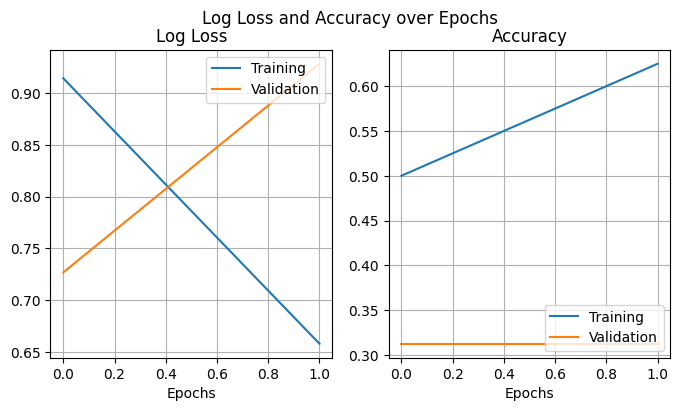

In [11]:
rec.plot_loss_accuracy()